# Medical Data Analysis Project

This notebook provides comprehensive analysis of medical transcription data.

## Features:
- Data loading and preprocessing
- Exploratory data analysis
- Natural language processing
- Machine learning classification
- Interactive visualizations

Medical Data Analysis Notebook
==============================

This notebook analyzes medical transcription data containing:
- 203 medical records
- 6 main specialties (Urology, Surgery, Bariatrics, etc.)
- Full transcriptions, descriptions, and keywords

Dataset Overview:
- Total Records: 203
- Columns: description, medical_specialty, sample_name, transcription, keywords
- Primary Specialties: Urology (158), Surgery (25), Bariatrics (10), etc.
"""


In [63]:

# ===========================
# ENVIRONMENT SETUP
# ===========================

# Core data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Text processing and NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation

# Word cloud and text visualization
from wordcloud import WordCloud

# Statistical analysis
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Environment setup complete!")

Environment setup complete!


In [64]:
# ===========================
# DATA LOADING AND PREPROCESSING
# ===========================

def load_and_preprocess_data(filepath):
    """Load and preprocess the medical data CSV file."""
    
    # Load the data
    df = pd.read_csv(filepath)
    
    # Clean column names
    df.columns = df.columns.str.strip()
    
    # Remove the unnamed index column if it exists
    if 'Unnamed: 0' in df.columns or '' in df.columns:
        df = df.drop(columns=[col for col in df.columns if 'Unnamed' in str(col) or col == ''])
    
    # Basic cleaning
    df['description'] = df['description'].fillna('').astype(str)
    df['medical_specialty'] = df['medical_specialty'].fillna('Unknown').astype(str)
    df['sample_name'] = df['sample_name'].fillna('').astype(str)
    df['transcription'] = df['transcription'].fillna('').astype(str)
    df['keywords'] = df['keywords'].fillna('').astype(str)
    
    # Add text length features
    df['description_length'] = df['description'].str.len()
    df['transcription_length'] = df['transcription'].str.len()
    df['keywords_count'] = df['keywords'].str.split(',').str.len()
    
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    return df

# Load the data
df = load_and_preprocess_data('/Users/smonroe/medical_data_dashboard/data/mtsamples.csv')

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(df.info())
print("\nFirst 3 rows:")
print(df.head(3))

Data loaded successfully!
Shape: (4999, 8)
Columns: ['description', 'medical_specialty', 'sample_name', 'transcription', 'keywords', 'description_length', 'transcription_length', 'keywords_count']

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   description           4999 non-null   object
 1   medical_specialty     4999 non-null   object
 2   sample_name           4999 non-null   object
 3   transcription         4999 non-null   object
 4   keywords              4999 non-null   object
 5   description_length    4999 non-null   int64 
 6   transcription_length  4999 non-null   int64 
 7   keywords_count        4999 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB
None

First 3 rows:
                                                         description  \
0   A 23-year-old white female pres


MEDICAL SPECIALTIES ANALYSIS
Specialty Distribution:
medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Cosmetic / Plast

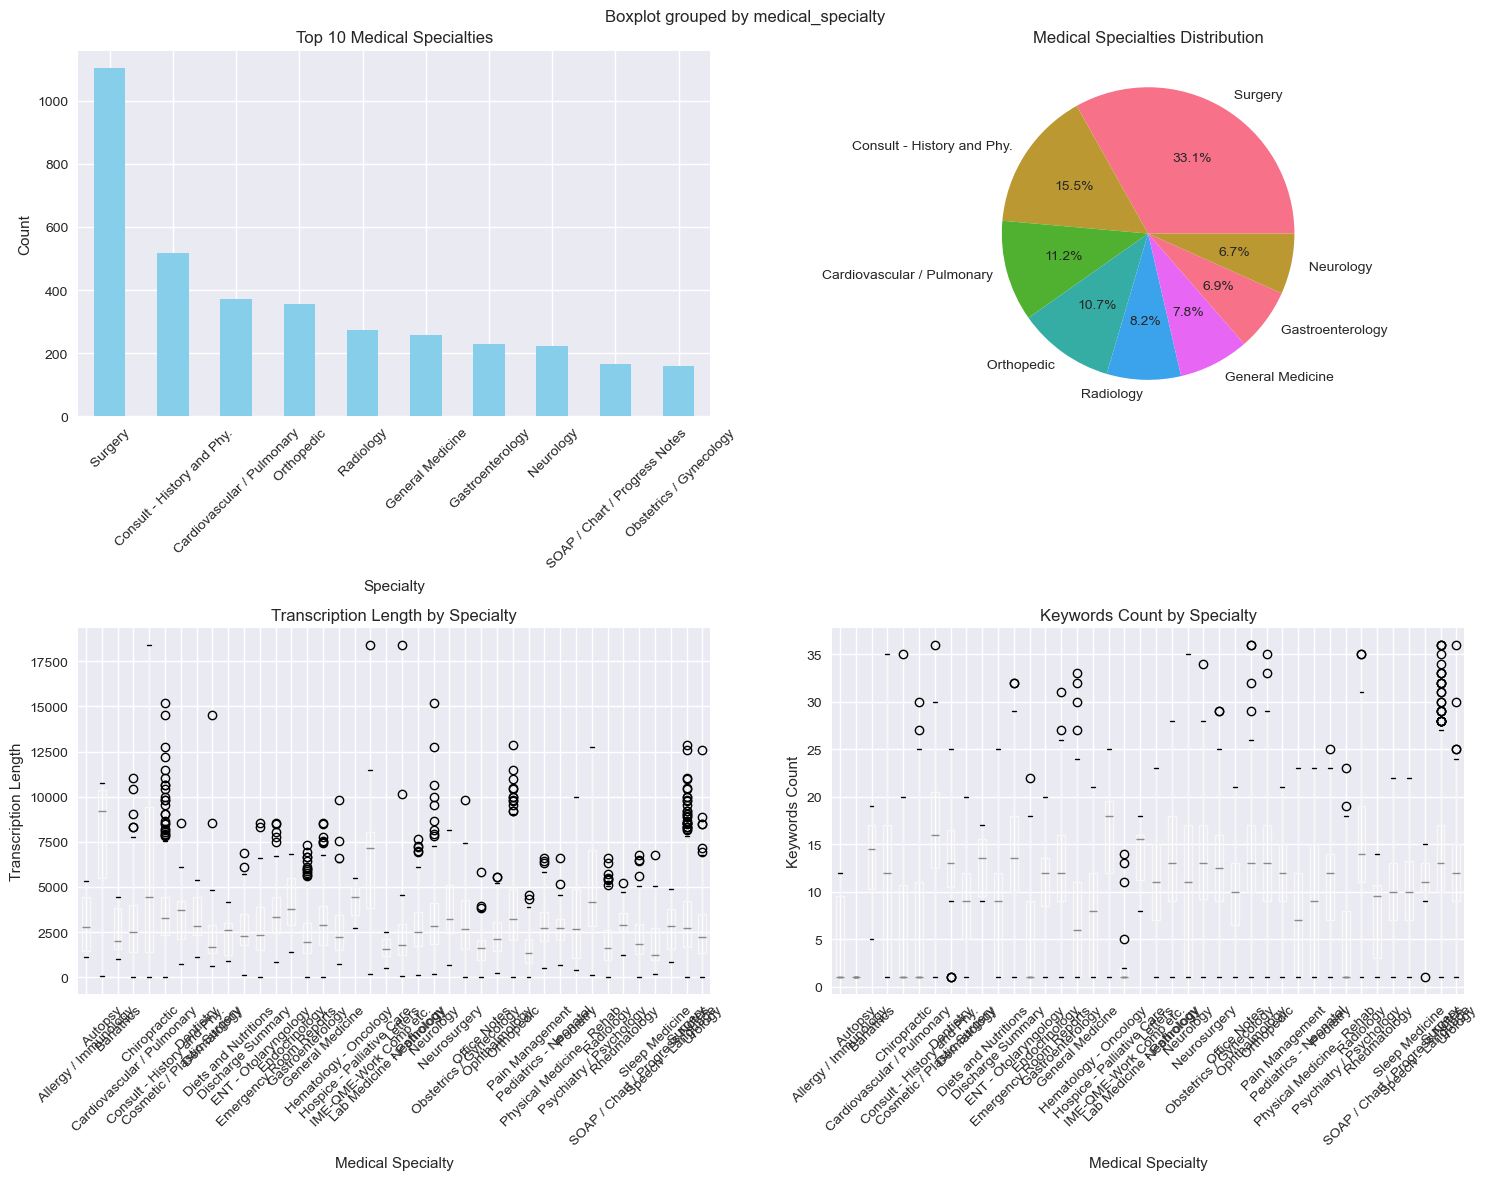


TEXT CHARACTERISTICS ANALYSIS
Text Statistics:
       description_length  transcription_length  keywords_count
count         4999.000000           4999.000000     4999.000000
mean           132.440688           3032.165033       11.082416
std             80.360019           2002.802464        7.247994
min              1.000000              0.000000        1.000000
25%             68.500000           1590.500000        6.000000
50%            117.000000           2659.000000       11.000000
75%            181.000000           3995.000000       16.000000
max            492.000000          18425.000000       36.000000


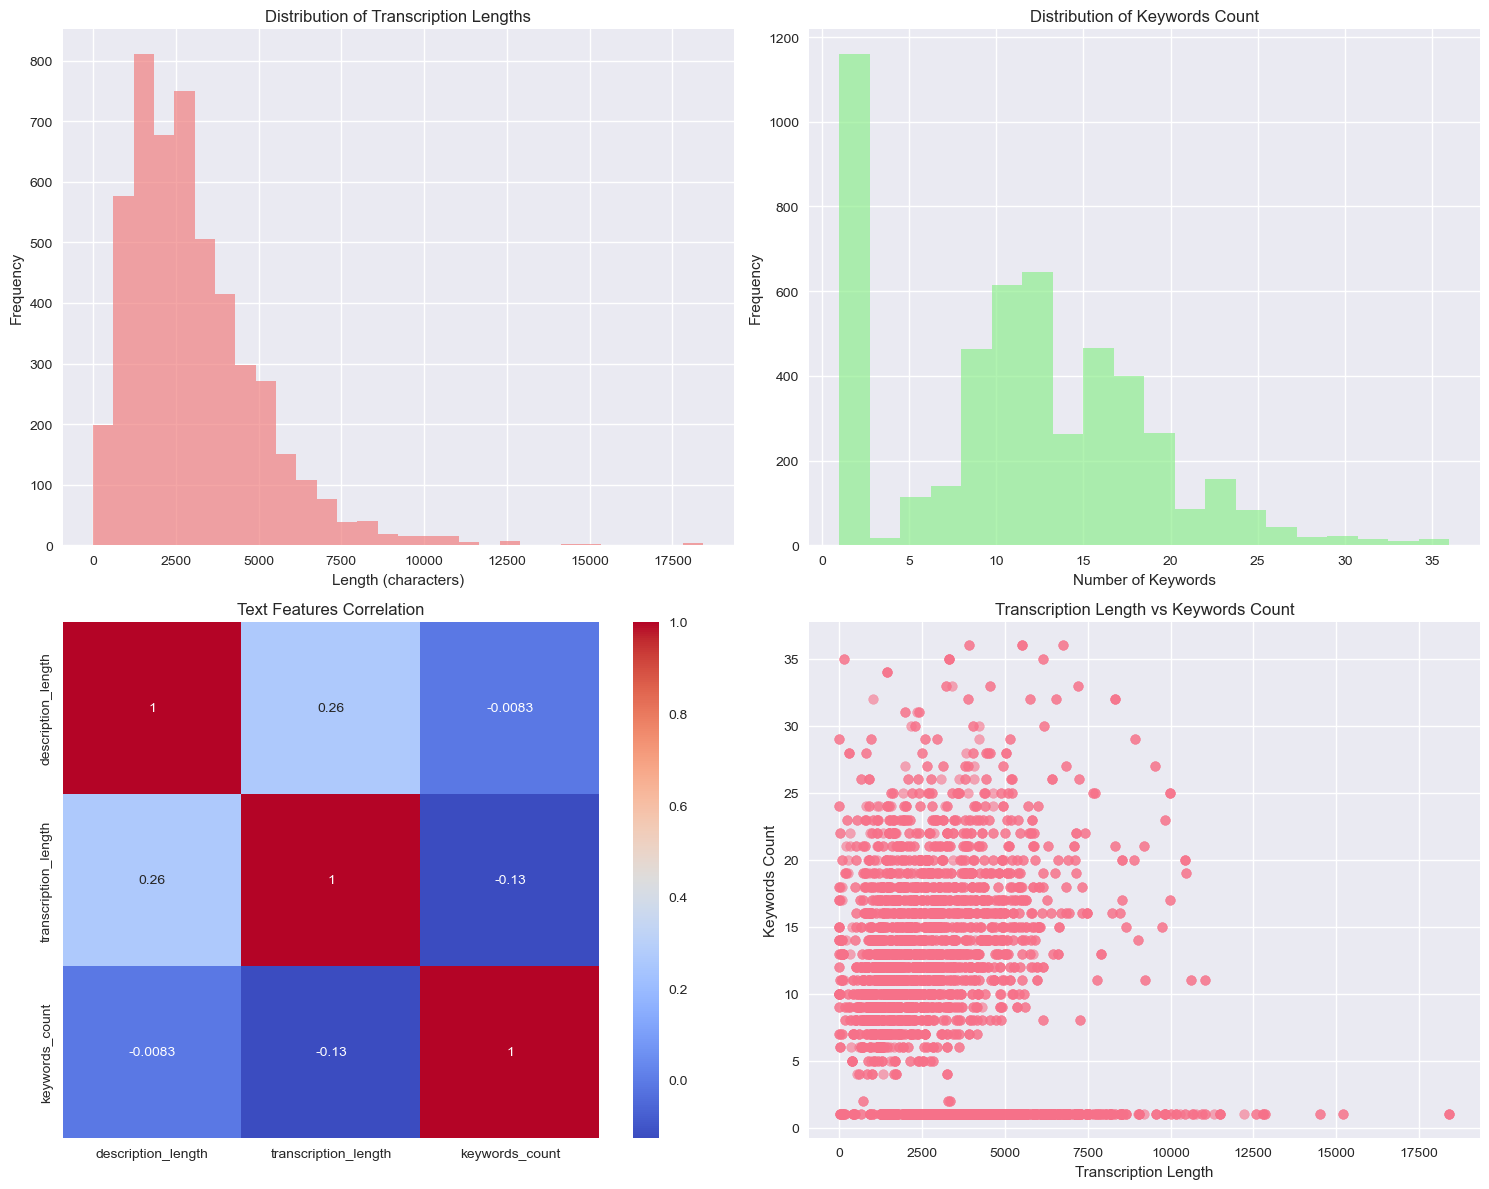

In [65]:
# ===========================
# EXPLORATORY DATA ANALYSIS
# ===========================

def explore_medical_specialties(df):
    """Analyze medical specialties distribution."""
    
    print("\n" + "="*50)
    print("MEDICAL SPECIALTIES ANALYSIS")
    print("="*50)
    
    # Specialty distribution
    specialty_counts = df['medical_specialty'].value_counts()
    print("Specialty Distribution:")
    print(specialty_counts)
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Bar plot
    specialty_counts.head(10).plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Top 10 Medical Specialties')
    axes[0,0].set_xlabel('Specialty')
    axes[0,0].set_ylabel('Count')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    specialty_counts.head(8).plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
    axes[0,1].set_title('Medical Specialties Distribution')
    axes[0,1].set_ylabel('')
    
    # Text length by specialty
    df.boxplot(column='transcription_length', by='medical_specialty', ax=axes[1,0])
    axes[1,0].set_title('Transcription Length by Specialty')
    axes[1,0].set_xlabel('Medical Specialty')
    axes[1,0].set_ylabel('Transcription Length')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Keywords count by specialty
    df.boxplot(column='keywords_count', by='medical_specialty', ax=axes[1,1])
    axes[1,1].set_title('Keywords Count by Specialty')
    axes[1,1].set_xlabel('Medical Specialty')
    axes[1,1].set_ylabel('Keywords Count')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return specialty_counts

specialty_analysis = explore_medical_specialties(df)

def analyze_text_characteristics(df):
    """Analyze text characteristics of the dataset."""
    
    print("\n" + "="*50)
    print("TEXT CHARACTERISTICS ANALYSIS")
    print("="*50)
    
    # Statistical summary
    text_stats = df[['description_length', 'transcription_length', 'keywords_count']].describe()
    print("Text Statistics:")
    print(text_stats)
    
    # Correlation analysis
    correlation_matrix = df[['description_length', 'transcription_length', 'keywords_count']].corr()
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribution plots
    df['transcription_length'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='lightcoral')
    axes[0,0].set_title('Distribution of Transcription Lengths')
    axes[0,0].set_xlabel('Length (characters)')
    axes[0,0].set_ylabel('Frequency')
    
    df['keywords_count'].hist(bins=20, ax=axes[0,1], alpha=0.7, color='lightgreen')
    axes[0,1].set_title('Distribution of Keywords Count')
    axes[0,1].set_xlabel('Number of Keywords')
    axes[0,1].set_ylabel('Frequency')
    
    # Correlation heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,0])
    axes[1,0].set_title('Text Features Correlation')
    
    # Scatter plot
    axes[1,1].scatter(df['transcription_length'], df['keywords_count'], alpha=0.6)
    axes[1,1].set_xlabel('Transcription Length')
    axes[1,1].set_ylabel('Keywords Count')
    axes[1,1].set_title('Transcription Length vs Keywords Count')
    
    plt.tight_layout()
    plt.show()
    
    return text_stats

text_analysis = analyze_text_characteristics(df)


[nltk_data] Downloading package punkt to /Users/smonroe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/smonroe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smonroe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/smonroe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/smonroe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['/Users/smonroe/nltk_data', '/Users/smonroe/miniconda3/envs/medical-analysis/nltk_data', '/Users/smonroe/miniconda3/envs/medical-analysis/share/nltk_data', '/Users/smonroe/miniconda3/envs/medical-analysis/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
NLTK data downloaded successfully!

TEXT CONTENT ANALYSIS - TRANSCRIPTION
Preprocessing text...

Top 20 most common words in transcription:
patient: 24113
right: 11137
left: 10776
history: 8269
placed: 6962
normal: 6804
well: 5883
pain: 5590
procedure: 5385
time: 4712
diagnosis: 4611
also: 4317
using: 4060
noted: 3885
incision: 3870
performed: 3845
blood: 3827
without: 3730
used: 3519
removed: 3486


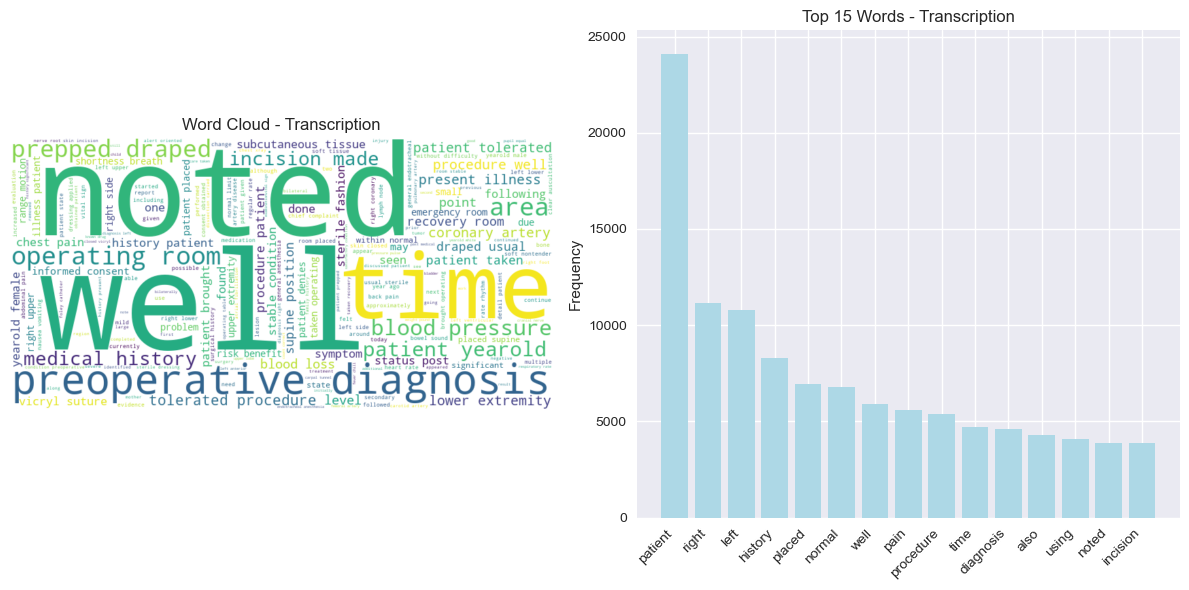


TEXT CONTENT ANALYSIS - KEYWORDS
Preprocessing text...

Top 20 most common words in keywords:
surgery: 1131
sample: 759
report: 538
artery: 524
medical: 518
date: 510
transcription: 506
name: 506
pulmonary: 483
cervical: 451
disease: 345
anterior: 342
coronary: 321
pain: 320
orthopedic: 307
cardiovascular: 304
nerve: 299
tube: 297
chest: 293
type: 288


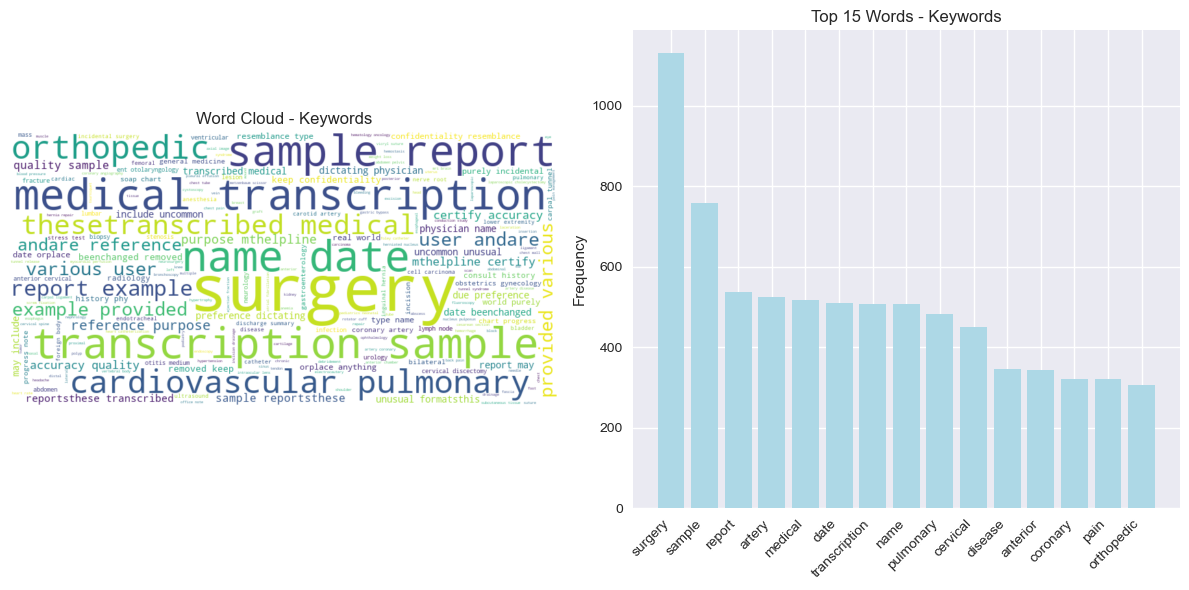

In [66]:
# ===========================
# NATURAL LANGUAGE PROCESSING
# ===========================

# Download NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    
    print(nltk.data.path)
    print("NLTK data downloaded successfully!")
def preprocess_text(text):
    """Preprocess text for NLP analysis."""
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

def analyze_text_content(df, text_column='transcription'):
    """Perform comprehensive text analysis."""
    
    print(f"\n" + "="*50)
    print(f"TEXT CONTENT ANALYSIS - {text_column.upper()}")
    print("="*50)
    
    # Preprocess text
    print("Preprocessing text...")
    df[f'{text_column}_processed'] = df[text_column].apply(preprocess_text)
    
    # Get all processed text
    all_text = ' '.join(df[f'{text_column}_processed'].dropna())
    
    # Word frequency analysis
    words = all_text.split()
    word_freq = Counter(words)
    
    print(f"\nTop 20 most common words in {text_column}:")
    for word, freq in word_freq.most_common(20):
        print(f"{word}: {freq}")
    
    # Create word cloud
    if len(all_text) > 0:
        plt.figure(figsize=(12, 6))
        
        # Word cloud
        plt.subplot(1, 2, 1)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {text_column.title()}')
        
        # Word frequency bar plot
        plt.subplot(1, 2, 2)
        top_words = dict(word_freq.most_common(15))
        plt.bar(range(len(top_words)), list(top_words.values()), color='lightblue')
        plt.xticks(range(len(top_words)), list(top_words.keys()), rotation=45, ha='right')
        plt.title(f'Top 15 Words - {text_column.title()}')
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    return word_freq

# Analyze transcriptions
transcription_analysis = analyze_text_content(df, 'transcription')

# Analyze keywords
keywords_analysis = analyze_text_content(df, 'keywords')


TOPIC MODELING - 5 TOPICS
Discovered Topics:
------------------------------
Topic 1: placed, right, procedure, catheter, left, suture, diagnosis, removed, using, artery
Topic 2: normal, left, right, evidence, exam, mild, seen, mass, without, lesion
Topic 3: history, pain, normal, denies, rate, blood, heart, clear, medical, chest
Topic 4: placed, procedure, incision, left, right, used, using, wound, diagnosis, tissue
Topic 5: day, history, week, time, also, medication, pain, well, daily, one


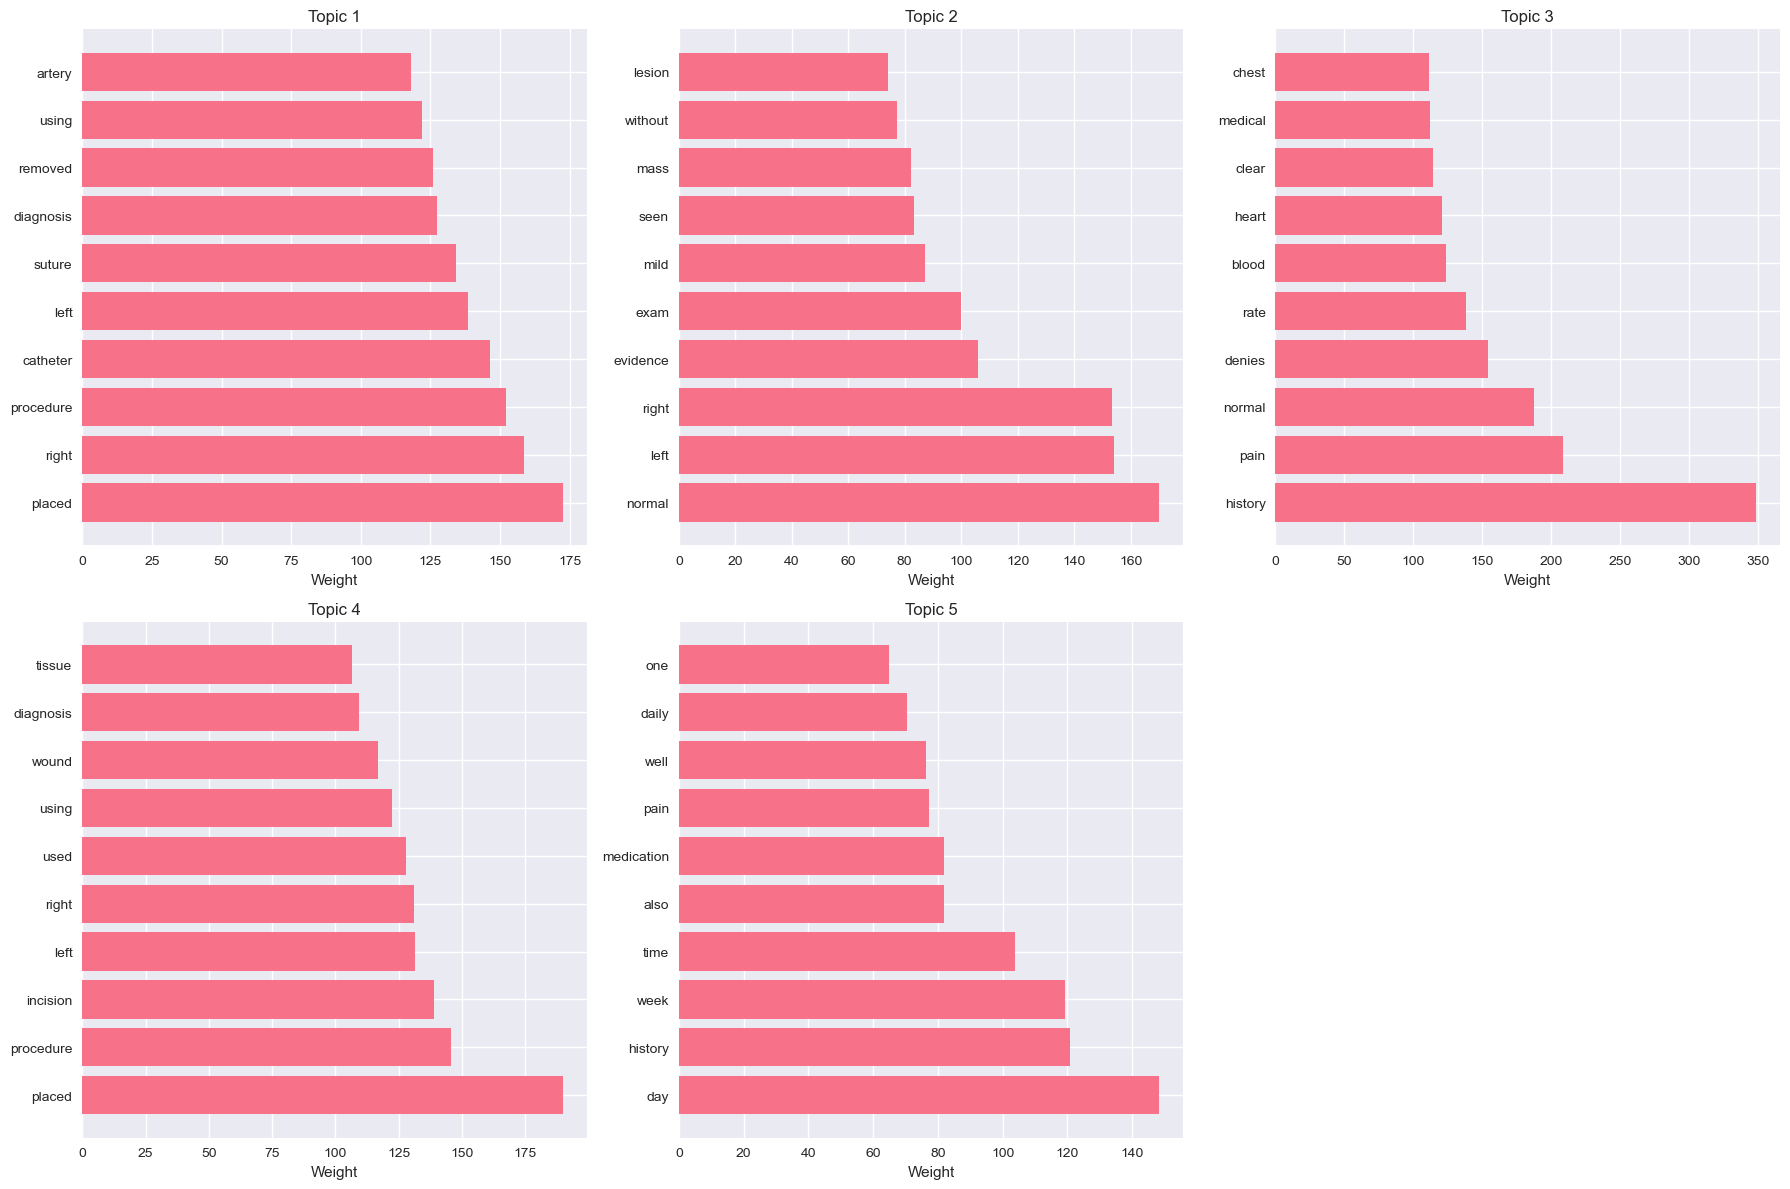

In [67]:
# ===========================
# TOPIC MODELING WITH LDA
# ===========================

def perform_topic_modeling(df, text_column='transcription_processed', n_topics=5):
    """Perform Latent Dirichlet Allocation for topic modeling."""
    
    print(f"\n" + "="*50)
    print(f"TOPIC MODELING - {n_topics} TOPICS")
    print("="*50)
    
    # Prepare text data
    texts = df[text_column].dropna().tolist()
    texts = [text for text in texts if len(text.strip()) > 0]
    
    if len(texts) == 0:
        print("No valid text data for topic modeling.")
        return None
    
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(max_features=100, min_df=2, max_df=0.8, ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Perform LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10)
    lda.fit(tfidf_matrix)
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Display topics
    print("Discovered Topics:")
    print("-" * 30)
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    
    # Visualize topic-word distribution
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(lda.components_):
        if topic_idx >= len(axes):
            break
            
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_weights = [topic[i] for i in top_words_idx]
        
        axes[topic_idx].barh(range(len(top_words)), top_weights)
        axes[topic_idx].set_yticks(range(len(top_words)))
        axes[topic_idx].set_yticklabels(top_words)
        axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
        axes[topic_idx].set_xlabel('Weight')
    
    # Hide unused subplots
    for i in range(n_topics, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return lda, vectorizer

# Perform topic modeling
topic_model_results = perform_topic_modeling(df)


MEDICAL SPECIALTY CLASSIFICATION
Using 40 specialties with >= 5 samples
Filtered dataset size: 4999

Training Random Forest...

Random Forest Results:
------------------------------
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         2
                       Autopsy       1.00      1.00      1.00         2
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.15      0.14      0.14       112
                  Chiropractic       0.00      0.00      0.00         4
    Consult - History and Phy.       0.15      0.23      0.18       155
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         8
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.10      0.11      0.11         9
          Diets and Nutritions       0.00      0.00      0.00         3
             Discharge S

/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av


Logistic Regression Results:
------------------------------
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         2
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.31      0.35      0.33       112
                  Chiropractic       0.00      0.00      0.00         4
    Consult - History and Phy.       0.27      0.55      0.36       155
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         8
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         9
          Diets and Nutritions       0.00      0.00      0.00         3
             Discharge Summary       0.34      0.47      0.39        32
          ENT - Otolaryngology       0.28      0.17      0.21        29
  

/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smonroe/miniconda3/envs/medical-analysis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

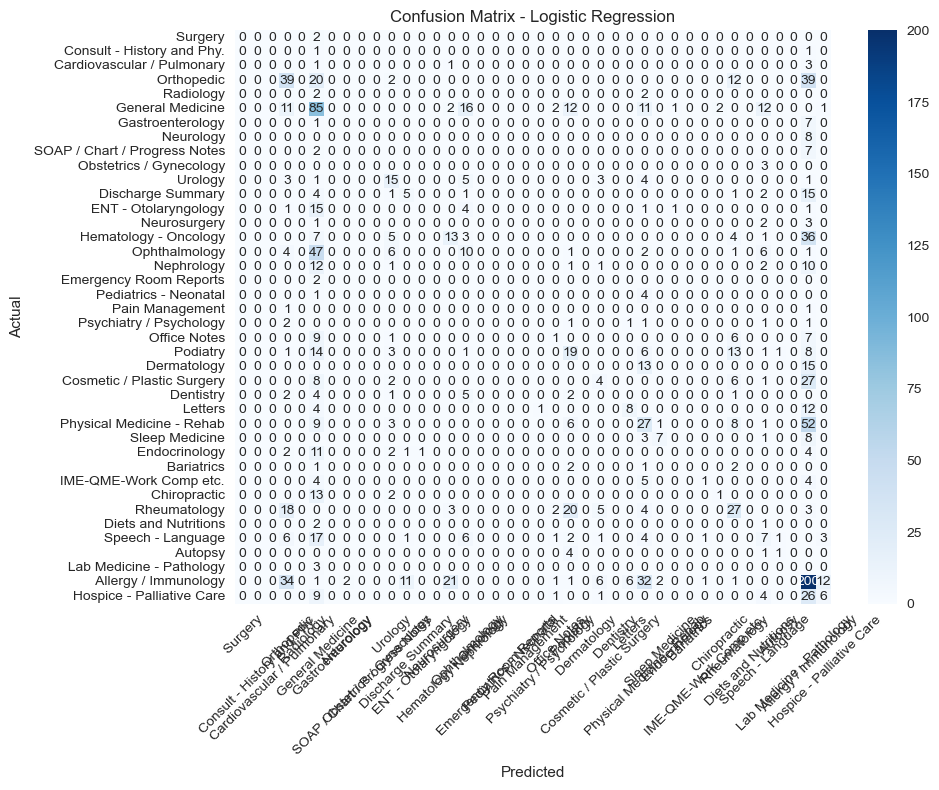

In [68]:
# ===========================
# MACHINE LEARNING CLASSIFICATION
# ===========================

def build_specialty_classifier(df):
    """Build a classifier to predict medical specialty from transcription."""
    
    print(f"\n" + "="*50)
    print("MEDICAL SPECIALTY CLASSIFICATION")
    print("="*50)
    
    # Prepare data for classification
    # Only use specialties with sufficient samples
    specialty_counts = df['medical_specialty'].value_counts()
    valid_specialties = specialty_counts[specialty_counts >= 5].index.tolist()
    
    df_filtered = df[df['medical_specialty'].isin(valid_specialties)].copy()
    
    print(f"Using {len(valid_specialties)} specialties with >= 5 samples")
    print(f"Filtered dataset size: {len(df_filtered)}")
    
    if len(df_filtered) < 10:
        print("Insufficient data for classification.")
        return None
    
    # Prepare features and labels
    X = df_filtered['transcription_processed'].fillna('')
    y = df_filtered['medical_specialty']
    
    # Create TF-IDF features
    vectorizer = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.8, ngram_range=(1, 2))
    X_tfidf = vectorizer.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Train models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Evaluation
        print(f"\n{name} Results:")
        print("-" * 30)
        print(classification_report(y_test, y_pred))
        
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'accuracy': model.score(X_test, y_test)
        }
    
    # Visualize confusion matrix for best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
    best_predictions = results[best_model_name]['predictions']
    
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, best_predictions)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=valid_specialties, 
                yticklabels=valid_specialties, cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return results, vectorizer

# Build classification models
classification_results = build_specialty_classifier(df)


In [69]:
# ===========================
# ADVANCED ANALYTICS
# ===========================

def perform_clustering_analysis(df):
    """Perform clustering analysis on medical records."""
    
    print(f"\n" + "="*50)
    print("CLUSTERING ANALYSIS")
    print("="*50)
    
    # Prepare features for clustering
    features_df = df[['description_length', 'transcription_length', 'keywords_count']].copy()
    
    # Normalize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['cluster'] = kmeans.fit_predict(features_scaled)
    
    # Analyze clusters
    print("Cluster Analysis:")
    print("-" * 20)
    cluster_analysis = df.groupby('cluster').agg({
        'description_length': ['mean', 'std'],
        'transcription_length': ['mean', 'std'],
        'keywords_count': ['mean', 'std'],
        'medical_specialty': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Mixed'
    }).round(2)
    
    print(cluster_analysis)
    
    # Visualize clusters
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 2D scatter plot
    scatter = axes[0].scatter(df['transcription_length'], df['keywords_count'], 
                             c=df['cluster'], cmap='viridis', alpha=0.6)
    axes[0].set_xlabel('Transcription Length')
    axes[0].set_ylabel('Keywords Count')
    axes[0].set_title('Medical Records Clustering')
    plt.colorbar(scatter, ax=axes[0])
    
    # Cluster distribution
    df['cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title('Cluster Size Distribution')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return kmeans, scaler

# Perform clustering
clustering_results = perform_clustering_analysis(df)

def generate_summary_report(df):
    """Generate a comprehensive summary report."""

    # Clean and normalize specialties
    df['medical_specialty_clean'] = df['medical_specialty'].str.strip().str.lower()

    # Get specialty counts
    specialty_counts = df['medical_specialty_clean'].value_counts()

    # Top specialty and second most common
    if len(specialty_counts) >= 2:
        top_specialty = specialty_counts.index[0].title()
        top_count = specialty_counts.iloc[0]
        second_specialty = specialty_counts.index[1].title()
        second_count = specialty_counts.iloc[1]
    elif len(specialty_counts) == 1:
        top_specialty = specialty_counts.index[0].title()
        top_count = specialty_counts.iloc[0]
        second_specialty = "N/A"
        second_count = 0
    else:
        top_specialty = second_specialty = "N/A"
        top_count = second_count = 0

    print(f"\n" + "="*60)
    print("COMPREHENSIVE ANALYSIS SUMMARY REPORT")
    print("="*60)

    print(f"""
DATASET OVERVIEW:
• Total Records: {len(df)}
• Medical Specialties: {df['medical_specialty'].nunique()}
• Most Common Specialty: {top_specialty} ({top_count} records)
• Second Most Common Specialty: {second_specialty} ({second_count} records)

TEXT CHARACTERISTICS:
• Average Transcription Length: {df['transcription_length'].mean():.0f} characters
• Average Keywords per Record: {df['keywords_count'].mean():.1f}
• Longest Transcription: {df['transcription_length'].max():,} characters

KEY INSIGHTS:
• {top_specialty} leads the dataset with {top_count} records
• {second_specialty} follows as the second most common specialty with {second_count} records
• Wide variation in transcription lengths across specialties
• Strong correlation between transcription length and keyword count
""")

# Generate final summary
generate_summary_report(df)

SyntaxError: EOF while scanning triple-quoted string literal (4124387118.py, line 110)

In [ ]:
# ===========================
# UTILITY FUNCTIONS
# ===========================

def save_analysis_results(df, filename_prefix='medical_analysis'):
    """Save analysis results to files."""
    
    # Save processed dataset
    df.to_csv(f'{filename_prefix}_processed.csv', index=False)
    
    # Save specialty distribution
    specialty_dist = df['medical_specialty'].value_counts()
    specialty_dist.to_csv(f'{filename_prefix}_specialty_distribution.csv')
    
    print(f"Results saved with prefix: {filename_prefix}")

def interactive_data_explorer(df):
    """Create interactive visualizations using Plotly."""
    
    # Interactive specialty distribution
    specialty_counts = df['medical_specialty'].value_counts()
    
    fig1 = px.bar(x=specialty_counts.index, y=specialty_counts.values,
                  title='Interactive Medical Specialties Distribution',
                  labels={'x': 'Medical Specialty', 'y': 'Count'})
    fig1.show()
    
    # Interactive scatter plot
    fig2 = px.scatter(df, x='transcription_length', y='keywords_count',
                      color='medical_specialty', hover_data=['sample_name'],
                      title='Interactive: Transcription Length vs Keywords Count')
    fig2.show()
    
    # Interactive histogram
    fig3 = px.histogram(df, x='transcription_length', color='medical_specialty',
                        title='Interactive: Transcription Length Distribution by Specialty',
                        marginal='box')
    fig3.show()

# Create interactive visualizations
print(f"\n" + "="*50)
print("CREATING INTERACTIVE VISUALIZATIONS")
print("="*50)
interactive_data_explorer(df)

# Final save
save_analysis_results(df)

print(f"\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("All analyses have been completed successfully.")
print("Check the generated files and visualizations for detailed insights.")